# U.S. Medical Insurance Costs

### Goals:


. . .

In [80]:
#Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
import numpy as np
from scipy import stats

In [14]:
#Create a data frame of the data
df_insurance = pd.read_csv('insurance.csv')
#Get an idea of the data
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
#Get summary stats of the data
df_insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
#Get averages of numerical data
avg_age = df_insurance['age'].mean()
print(f"Average Age: {avg_age}")

avg_bmi = df_insurance['bmi'].mean()
print(f"Average Bmi: {avg_bmi}")

avg_children = df_insurance['children'].mean()
print(f"Average Number of Children: {avg_children}")

avg_insurance_cost = df_insurance['charges'].mean()
print(f"Average Insurance Cost: {avg_insurance_cost}$")

Average Age: 39.20702541106129
Average Bmi: 30.66339686098655
Average Number of Children: 1.0949177877429
Average Insurance Cost: 13270.422265141257$


sex             female          male
age          39.503021     38.917160
bmi          30.377749     30.943129
children      1.074018      1.115385
charges   12569.578844  13956.751178
      index  Gender    Avg Values
0       age  female     39.503021
1       bmi  female     30.377749
2  children  female      1.074018
3   charges  female  12569.578844
4       age    male     38.917160
5       bmi    male     30.943129
6  children    male      1.115385
7   charges    male  13956.751178


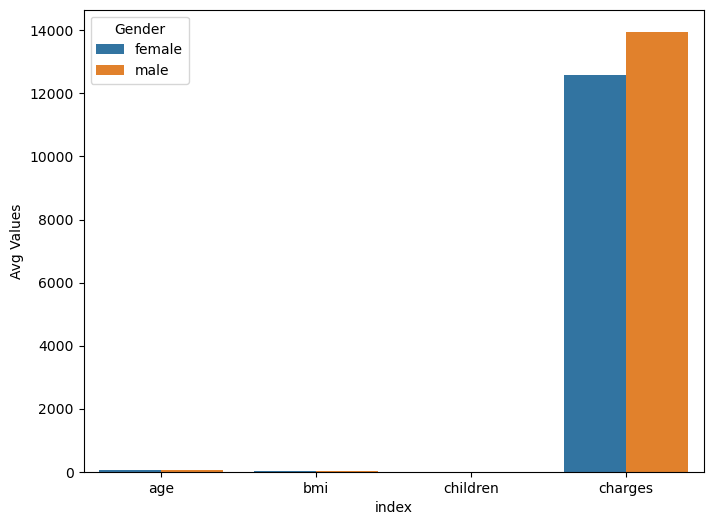

In [36]:
#Get an idea of the distribution of males/females for each category (numerical)
df_male_female = df_insurance.groupby(['sex']).mean(numeric_only=True).T
print(df_male_female)
#Melt the data to create a comparison Bar plot
df_male_female = df_male_female.reset_index() #To convert the index to a column

df_male_female_long = df_male_female.melt(id_vars='index', value_vars=['female', 'male'], var_name='Gender', value_name='Avg Values')
print(df_male_female_long)
#Now plot
plt.figure(figsize=(8, 6))
male_female_comparisonPlot = sns.barplot(data=df_male_female_long, x='index', y='Avg Values', hue='Gender')
plt.show()

In [41]:
#Next let's look at the count of males and females in the data frame
df_insurance.groupby(['sex']).size()

sex
female    662
male      676
dtype: int64

smoker   no  yes
sex             
female  547  115
male    517  159


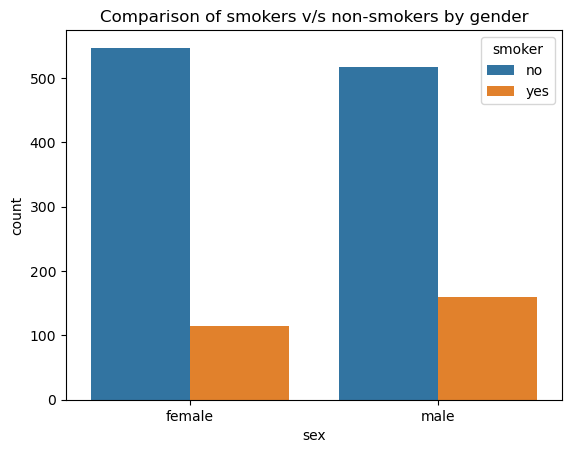

In [55]:
#Next say i want to look at males and females who smoke and who do not smoke
#First group the data
df_smoker_count = df_insurance.groupby(['sex', 'smoker']).size()
#print(df_smoker_count)
#To make it more readable
df_smoker_count = df_smoker_count.reset_index(name='count')
#print(df_smoker_count)
#To create a pivot table out of this
pivot_table = df_smoker_count.pivot(index='sex', columns='smoker', values='count')
print(pivot_table)
#Create a plot
sns.barplot(data=df_smoker_count, x='sex', y='count', hue='smoker')
plt.title('Comparison of smokers v/s non-smokers by gender')
plt.show()

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64
  smoker       charges
0     no   8434.268298
1    yes  32050.231832


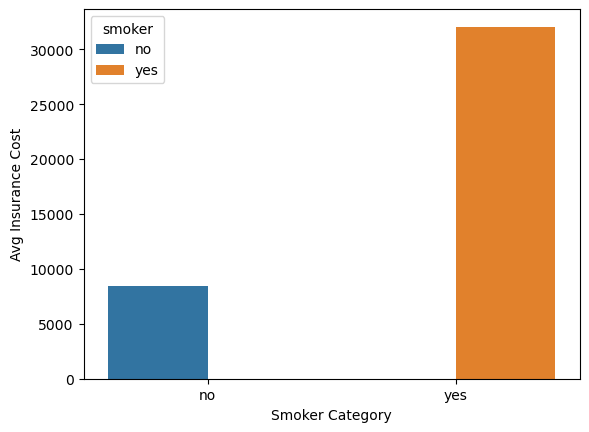

In [68]:
#Next I want to compare the insurance costs of smoker v/s non-smokers
df_smoker = df_insurance.groupby(['smoker'])

#To get mean insurance costs by smoker category
df_comparison_costs = df_smoker['charges'].mean()
print(df_comparison_costs)
df_comparison_costs = df_comparison_costs.reset_index(name='charges')
print(df_comparison_costs)
#plot a box plot
sns.barplot(data=df_comparison_costs, x='smoker', y='charges', hue='smoker')
plt.xlabel('Smoker Category')
plt.ylabel('Avg Insurance Cost')
plt.show()

      region   Median Cost
0  northeast  10057.652025
1  northwest   8965.795750
2  southeast   9294.131950
3  southwest   8798.593000


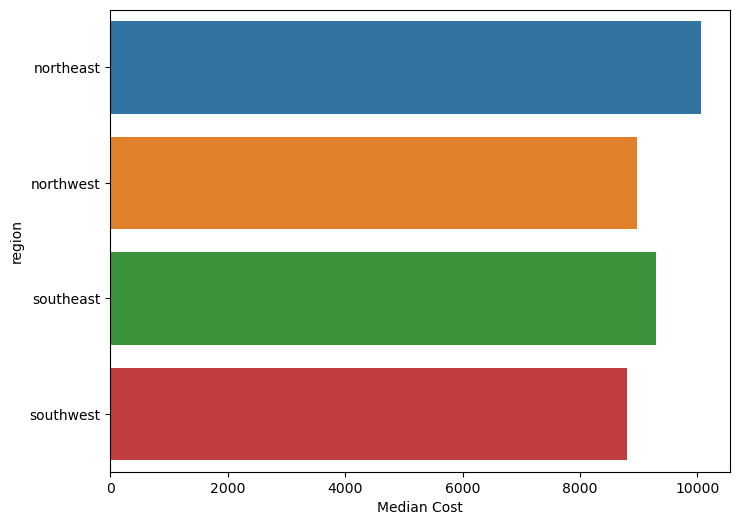

In [75]:
#Next I want to groupy by region, and check median insurance costs region wise 
df_region_grp = df_insurance.groupby(['region'])
df_region_costs = df_region_grp['charges'].median()
df_region_costs =df_region_costs.reset_index(name='Median Cost')
print(df_region_costs)
plt.figure(figsize=(8, 6))
sns.barplot(x=df_region_costs['Median Cost'], y=df_region_costs['region'])
plt.show()

      region    Total Cost
0  northeast  4.343669e+06
1  northwest  4.035712e+06
2  southeast  5.363690e+06
3  southwest  4.012755e+06


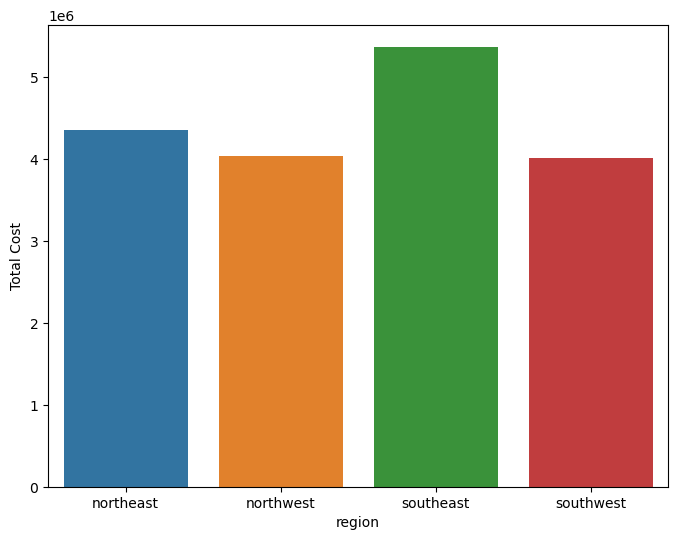

In [76]:
df_region_grp = df_insurance.groupby(['region'])
df_region_costs = df_region_grp['charges'].sum()
df_region_costs =df_region_costs.reset_index(name='Total Cost')
print(df_region_costs)
plt.figure(figsize=(8, 6))
sns.barplot(y=df_region_costs['Total Cost'], x=df_region_costs['region'])
plt.show()

              age   charges
age      1.000000  0.299008
charges  0.299008  1.000000


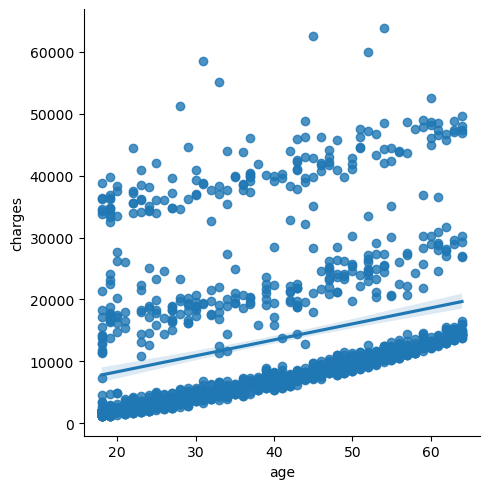

In [78]:
#Let's say I wanted to see if there's a correlation between age and insurance costs
df_age_charges = df_insurance[['age', 'charges']]
correlation_age_charges = df_age_charges.corr()
print(correlation_age_charges)
sns.lmplot(data=df_age_charges, x='age', y='charges')
plt.show()

lmplot is a function in Seaborn, a Python visualization library, that is used to create scatter plots with an optional regression line. The name "lmplot" stands for "linear model plot." It combines regplot, which plots the data and a linear regression model fit, and FacetGrid, which is used for plotting conditional relationships.

Key features of lmplot:

Regression Line: By default, lmplot adds a regression line to the scatter plot, showing the linear relationship between the two variables.

Faceting: lmplot allows you to create plots that represent different subsets of your data based on the values of one or more categorical variables. This is known as faceting.

Customization: It offers various customization options, such as controlling the size and aspect ratio of the plot, dividing the data into subplots based on a categorical feature, and more.

Aesthetics: As with other Seaborn functions, lmplot integrates well with Pandas DataFrames and can leverage the Seaborn aesthetic styles for more attractive and informative plots.

            smoker_num   charges
smoker_num    1.000000  0.787251
charges       0.787251  1.000000
Correlation 0.7872514304984775
P-value 8.271435842172409e-283


<Figure size 800x600 with 0 Axes>

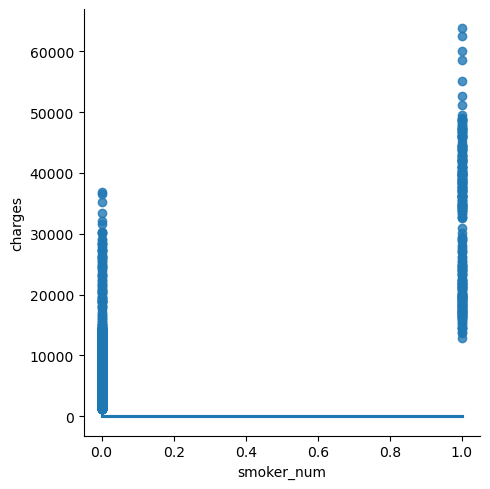

In [85]:
# I want to calculate correlation between smoking and insurance costs
df_insurance['smoker_num'] = df_insurance['smoker'].map({'yes': 1, 'no': 0})
correlation_smoker = df_insurance[['smoker_num', 'charges']].corr()
print(correlation_smoker)
#Since one variable is continuous and the other binary
correlation, p_value = stats.pointbiserialr(df_insurance['smoker_num'], df_insurance['charges'])
print(f"Correlation {correlation}")
print(f"P-value {p_value}")
#plot
plt.figure(figsize=(8, 6))
sns.lmplot(data=df_insurance , x='smoker_num', y='charges', logistic=True, ci=None)
plt.show()

> Understanding the Correlation Coefficient
The correlation coefficient of 0.787251 is close to 1, which indicates a strong positive linear relationship between smoking status and insurance charges.
A value near 1 suggests that as one variable increases, the other variable tends to also increase. In your case, it means that smokers (represented by smoker_num = 1) tend to have higher insurance charges.
Interpreting the P-value
The p-value you mentioned is extremely small (
8.27
×
1
0
−
283
8.27×10 
−283
 ). In scientific notation, this is a number very close to zero.
A small p-value (typically < 0.05) indicates strong evidence against the null hypothesis, which in this case is that there is no relationship between smoking status and insurance charges.
Therefore, a p-value this small suggests that the observed correlation is statistically significant.
Conclusion
The high correlation coefficient combined with the extremely small p-value strongly indicates that there is a significant relationship between being a smoker and higher insurance charges.
This result is statistically significant, meaning it is very unlikely to have occurred by chance.

Confidence Interval (ci) in Seaborn Plots
The ci parameter in Seaborn's plotting functions refers to the "Confidence Interval." It's used to display the uncertainty of the estimated values. A confidence interval provides a range of values within which we can be certain (to a degree specified by the confidence level, usually 95%) that the true value lies.

In the context of sns.lmplot(), setting ci=None means that the confidence interval will not be shown around the regression line. If it's set to a number (like 95), it would show the 95% confidence interval for the regression estimate.
Logistic Regression Model
A logistic regression model is used in statistics to model the probability of a certain class or event existing, such as pass/fail, win/lose, alive/dead, or in your case, smoker/non-smoker. This is different from a linear regression model that predicts a continuous outcome.

Why Logistic Regression for Binary Data: In your case, where you have a binary predictor (smoker or non-smoker), a logistic regression model is more appropriate than a linear regression model. It models the probability that each input belongs to a particular category. For instance, it could model the probability of being a smoker as a function of insurance charges.
Point-Biserial Correlation Coefficient
The point-biserial correlation coefficient is a special case of the Pearson correlation coefficient used when one variable is continuous and the other is binary.

How stats.pointbiserialr Works: This function computes the point-biserial correlation coefficient and the associated p-value. The correlation coefficient measures the strength and direction of the linear relationship between a binary variable and a continuous variable.

The correlation value ranges from -1 to 1, where:

1 means a perfect positive relationship,
-1 means a perfect negative relationship,
0 means no linear relationship.
The p-value indicates the probability of observing the data if the null hypothesis (that there is no association between the variables) is true. A low p-value (< 0.05) suggests that the observed correlation is statistically significant.

Practical Example
In the context of your data:

You're using logistic regression in the plot to model the probability of higher charges as a function of being a smoker or not.
The point-biserial correlation gives you a statistical measure of how strongly smoking status is associated with insurance charges.